In [114]:
import pandas as pd

SSBCIData = pd.read_csv('/Users/tomkelly/Desktop/Spring 2022/DATA 606/Data/SSBCI Transactions Dataset.csv')

In [115]:
SSBCIData.head()

,state_id,state_name,year_reported,program_name,program_type,unique_id,disbursement_date,loan_investment_amount,ssbci_original_funds,nonprivate_amount,...,optional_revenue,optional_revenue_yr_confirmed,optional_active,optional_active_no,optional_active_unknown,optional_dollars_lost,optional_business_city,optional_business_state,optional_coinvestment_source,optional_stage
0,AK,Alaska - Anchorage,2013,49th State Venture Fund,Venture Capital,AK_2013_VCP_1,3/1/2013,180000.0,90000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,Alaska - Anchorage,2013,49th State Venture Fund,Venture Capital,AK_2013_VCP_2,7/13/2013,2400000.0,250000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,Alaska - Anchorage,2013,49th State Venture Fund,Venture Capital,AK_2013_VCP_3,12/30/2013,265000.0,110000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,Alaska - Anchorage,2014,49th State Venture Fund,Venture Capital,AK_2014_VCP_1,4/11/2014,199500.0,99750.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,Alaska - Anchorage,2014,49th State Venture Fund,Venture Capital,AK_2014_VCP_2,5/15/2014,125000.0,62500.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
SSBCIData.columns

Index(['state_id', 'state_name', 'year_reported', 'program_name',
       'program_type', 'unique_id', 'disbursement_date',
       'loan_investment_amount', 'ssbci_original_funds', 'nonprivate_amount',
       'concurrent_private_financing', 'borrower_insurance_premium',
       'lender_insurance_premium', 'guaranteed_amount', 'collateral_support',
       'ssbci_recycled_funds', 'subsequent_private_financing', 'zip_code',
       'metro_type', 'LMI_type', 'revenue', 'full_time_employees',
       'naics_code', 'year_incorporated', 'jobs_created', 'jobs_retained',
       'trans_type', 'lender_name', 'lender_type', 'lender_type_category',
       'CDFI_type', 'MDI_type', 'VC_cat', 'optional_woman_owned',
       'optional_minority_owned', 'optional_veteran_owned', 'optional_FTE',
       'optional_FTE_yr_confirmed', 'optional_primary_use_of_funds',
       'optional_revenue', 'optional_revenue_yr_confirmed', 'optional_active',
       'optional_active_no', 'optional_active_unknown',
       'option

In [117]:
SSBCIData.shape

(21962, 49)

In [118]:
SSBCIData.dtypes

state_id                          object
state_name                        object
year_reported                      int64
program_name                      object
program_type                      object
unique_id                         object
disbursement_date                 object
loan_investment_amount           float64
ssbci_original_funds             float64
nonprivate_amount                float64
concurrent_private_financing     float64
borrower_insurance_premium       float64
lender_insurance_premium         float64
guaranteed_amount                float64
collateral_support               float64
ssbci_recycled_funds             float64
subsequent_private_financing     float64
zip_code                           int64
metro_type                        object
LMI_type                          object
revenue                          float64
full_time_employees              float64
naics_code                         int64
year_incorporated                  int64
jobs_created    

In [119]:
SSBCIData.isnull().sum()

state_id                             0
state_name                           0
year_reported                        0
program_name                         0
program_type                         0
unique_id                            0
disbursement_date                    0
loan_investment_amount               0
ssbci_original_funds                 0
nonprivate_amount                    0
concurrent_private_financing         0
borrower_insurance_premium           0
lender_insurance_premium             0
guaranteed_amount                    0
collateral_support                   0
ssbci_recycled_funds                 0
subsequent_private_financing         0
zip_code                             0
metro_type                           0
LMI_type                             0
revenue                              0
full_time_employees                  0
naics_code                           0
year_incorporated                    0
jobs_created                         0
jobs_retained            

In [120]:
!pip install mlxtend

In [121]:
cols2 = ['loan_investment_amount','ssbci_original_funds','nonprivate_amount','concurrent_private_financing',
          'guaranteed_amount','revenue', 'full_time_employees', 'jobs_created', 
       'jobs_retained']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f77880e88b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f77880b0100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f77880e8b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f77880b0910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f77880b0cd0>],
 'means': []}

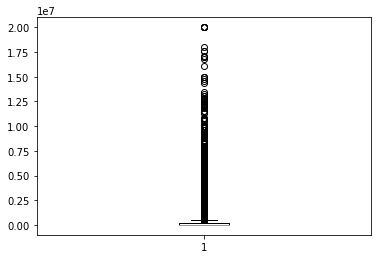

In [122]:
import matplotlib.pyplot as plt

plt.boxplot(SSBCIData['loan_investment_amount'])

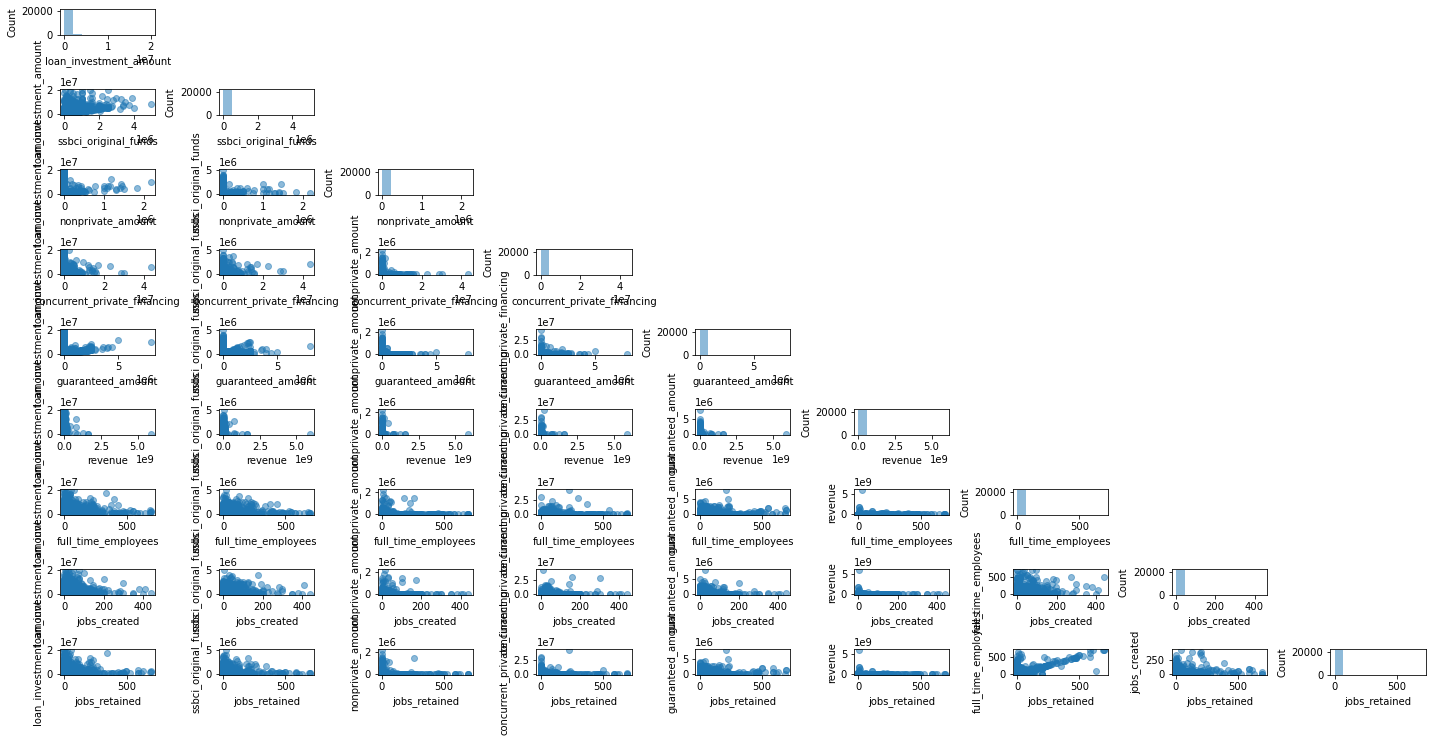

In [123]:
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(SSBCIData[cols2].values, figsize= (20,10), names=cols2, alpha=0.5)
plt.tight_layout()
plt.show()

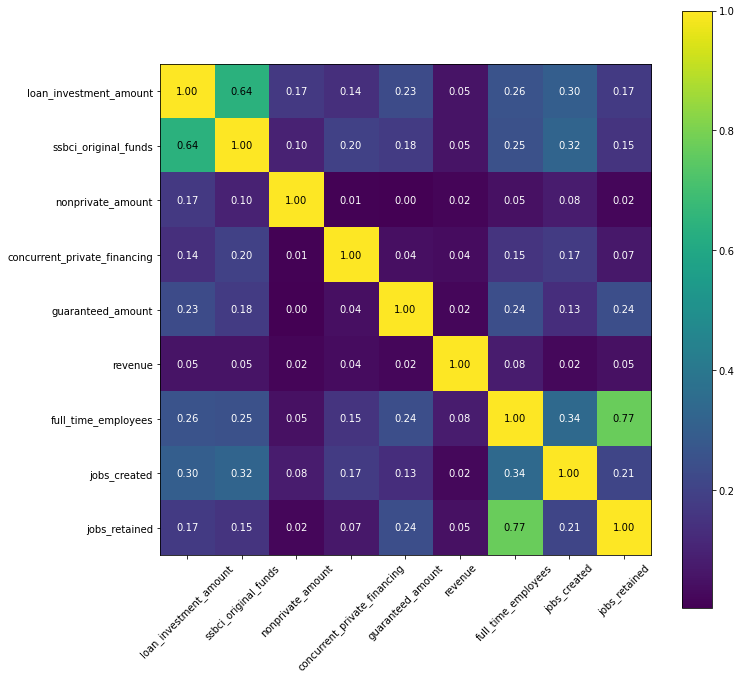

In [124]:
from mlxtend.plotting import heatmap
import numpy as np


cm = np.corrcoef(SSBCIData[cols2].values.T)
hm = heatmap(cm, row_names = cols2, column_names = cols2, figsize=(11,11))

plt.show()

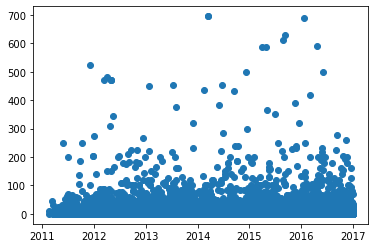

In [125]:
import datetime
dates = SSBCIData['disbursement_date']
SSBCIData['disbursement_date'] = pd.to_datetime(SSBCIData['disbursement_date'], format="%m/%d/%Y")
loan_amount = SSBCIData['loan_investment_amount']
plt.scatter(SSBCIData['disbursement_date'],SSBCIData['jobs_retained'])



In [126]:
df = SSBCIData[['disbursement_date', 'full_time_employees']]
df.head()
corr_df = df.set_index('disbursement_date')
seriesData = corr_df.squeeze()

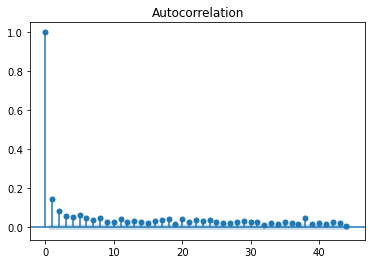

In [127]:
# timeseries recording @ 1 hr
# stationary: autocorrelation quickly drops
# autocorrelation between time t an t-1 decays rapidly

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(seriesData);
#test = pd.concat([x_values, loan_amount])

In [128]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(corr_df)
print('The test statistic is {} and p-value of ADF test is {}'.format(stat_test[0], 
                                                                      stat_test[1]))

The test statistic is -17.976153363889576 and p-value of ADF test is 2.7849004642908286e-30


In [129]:
stat_test = adfuller(corr_df.diff().dropna())
print('The test statistic is {} and p-value of ADF test is {}'.format(stat_test[0], 
                                                                      stat_test[1]))

The test statistic is -34.9813622074048 and p-value of ADF test is 0.0


In [130]:
df2 = SSBCIData[['disbursement_date', 'jobs_retained']]
df2.head()
corr_df2 = df2.set_index('disbursement_date')
seriesData2 = corr_df2.squeeze()

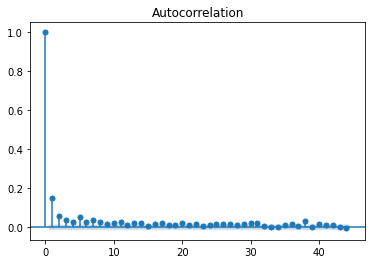

In [131]:
# timeseries recording @ 1 hr
# stationary: autocorrelation quickly drops
# autocorrelation between time t an t-1 decays rapidly

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(seriesData2);
#test = pd.concat([x_values, loan_amount])

In [132]:
from statsmodels.tsa.stattools import adfuller
stat_test2 = adfuller(corr_df2)
print('The test statistic is {} and p-value of ADF test is {}'.format(stat_test[0], 
                                                                      stat_test[1]))

The test statistic is -34.9813622074048 and p-value of ADF test is 0.0


In [133]:
stat_test2 = adfuller(corr_df.diff().dropna())
print('The test statistic is {} and p-value of ADF test is {}'.format(stat_test[0], 
                                                                      stat_test[1]))

The test statistic is -34.9813622074048 and p-value of ADF test is 0.0


In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
Xlin = SSBCIData[['full_time_employees']].values
ylin = SSBCIData['jobs_retained'].values

In [136]:
slr = LinearRegression()
reg = slr.fit(Xlin, ylin)
y_pred = slr.predict(Xlin)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.624
Intercept: 0.779


In [137]:
print('R^2 score', reg.score(Xlin, ylin))

R^2 score 0.5977807109952975


In [138]:
def lin_regplot(Xlin, ylin, model):
    plt.scatter(Xlin, ylin, c='steelblue', edgecolor='white', s=70)
    plt.plot(Xlin, model.predict(Xlin), color='black', lw=2)    
    return 

### Linear Regression plot shows that the number of full time employees at the time of the loan closure is positively correlated with the number of jobs retained as a direct result of the loan

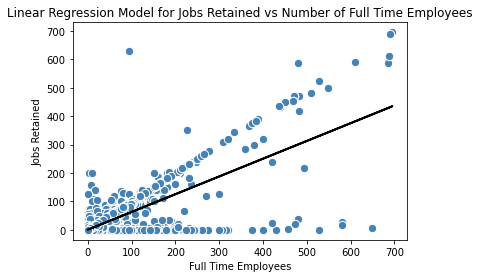

In [139]:
lin_regplot(Xlin, ylin, slr)
plt.title('Linear Regression Model for Jobs Retained vs Number of Full Time Employees')
plt.xlabel('Full Time Employees')
plt.ylabel('Jobs Retained')


plt.show()